# https://towardsdatascience.com/beginners-guide-to-pyspark-bbe3b553b79f

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.master("local[*]").appName('PySpark_Tutorial').getOrCreate()

In [3]:
spark

In [5]:
dir(spark)

['Builder',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activeSession',
 '_conf',
 '_convert_from_pandas',
 '_createFromLocal',
 '_createFromRDD',
 '_create_dataframe',
 '_create_from_pandas_with_arrow',
 '_create_shell_session',
 '_get_numpy_record_dtype',
 '_inferSchema',
 '_inferSchemaFromList',
 '_instantiatedSession',
 '_jsc',
 '_jsparkSession',
 '_jvm',
 '_jwrapped',
 '_repr_html_',
 '_sc',
 '_wrapped',
 'builder',
 'catalog',
 'conf',
 'createDataFrame',
 'getActiveSession',
 'newSession',
 'range',
 'read',
 'readStream',
 'sparkContext',
 'sql',
 'stop',
 'streams',
 'table',
 'udf',
 'version']

In [6]:
help(spark)

Help on SparkSession in module pyspark.sql.session object:

class SparkSession(pyspark.sql.pandas.conversion.SparkConversionMixin)
 |  SparkSession(sparkContext, jsparkSession=None)
 |  
 |  The entry point to programming Spark with the Dataset and DataFrame API.
 |  
 |  A SparkSession can be used create :class:`DataFrame`, register :class:`DataFrame` as
 |  tables, execute SQL over tables, cache tables, and read parquet files.
 |  To create a :class:`SparkSession`, use the following builder pattern:
 |  
 |  .. autoattribute:: builder
 |     :annotation:
 |  
 |  Examples
 |  --------
 |  >>> spark = SparkSession.builder \
 |  ...     .master("local") \
 |  ...     .appName("Word Count") \
 |  ...     .config("spark.some.config.option", "some-value") \
 |  ...     .getOrCreate()
 |  
 |  >>> from datetime import datetime
 |  >>> from pyspark.sql import Row
 |  >>> spark = SparkSession(sc)
 |  >>> allTypes = sc.parallelize([Row(i=1, s="string", d=1.0, l=1,
 |  ...     b=True, list=[1,

In [8]:
# Reading CSV file

csv_file = 'D:/Projects/saket1471/learn-spark/data/stocks_price_final.csv'
df = spark.read.csv(csv_file)

In [7]:

# # Reading JSON file

# json_file = 'data/stocks_price_final.json'
# data = spark.read.json(json_file)

# # Reading parquet file

# parquet_file = 'data/stocks_price_final.parquet'
# data1 = spark.read.parquet(parquet_file)

In [9]:
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string]

In [10]:
df.show()

+----+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
| _c0|   _c1|       _c2|      _c3|      _c4|      _c5|      _c6|    _c7|      _c8|       _c9|         _c10|                _c11|    _c12|
+----+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|null|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
|   1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   4|   TXG|2019-09-17|56.209999|

In [15]:
# Before structuring schema

data = spark.read.csv(
    'D:/Projects/saket1471/learn-spark/data/stocks_price_final.csv',
    sep = ',',
    header = True,
    )

In [16]:
data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [4]:
from pyspark.sql.types import *

In [5]:
data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market_cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

In [6]:
final_struc = StructType(fields = data_schema)

In [7]:
data = spark.read.csv(
    'D:/Projects/saket1471/learn-spark/data/stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc 
    )

In [8]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [56]:
data.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(symbol,StringType,true),StructField(data,DateType,true),StructField(open,DoubleType,true),StructField(high,DoubleType,true),StructField(low,DoubleType,true),StructField(close,DoubleType,true),StructField(volume,IntegerType,true),StructField(adjusted,DoubleType,true),StructField(market_cap,StringType,true),StructField(sector,StringType,true),StructField(industry,StringType,true),StructField(exchange,StringType,true)))

In [57]:
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('data', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market_cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [24]:
data.head(10)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', data=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market.cap='$9.31B', sector='Capit

In [25]:
type(data)

pyspark.sql.dataframe.DataFrame

In [26]:
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [27]:
help(data.show)

Help on method show in module pyspark.sql.dataframe:

show(n=20, truncate=True, vertical=False) method of pyspark.sql.dataframe.DataFrame instance
    Prints the first ``n`` rows to the console.
    
    .. versionadded:: 1.3.0
    
    Parameters
    ----------
    n : int, optional
        Number of rows to show.
    truncate : bool or int, optional
        If set to ``True``, truncate strings longer than 20 chars by default.
        If set to a number greater than one, truncates long strings to length ``truncate``
        and align cells right.
    vertical : bool, optional
        If set to ``True``, print output rows vertically (one line
        per column value).
    
    Examples
    --------
    >>> df
    DataFrame[age: int, name: string]
    >>> df.show()
    +---+-----+
    |age| name|
    +---+-----+
    |  2|Alice|
    |  5|  Bob|
    +---+-----+
    >>> df.show(truncate=3)
    +---+----+
    |age|name|
    +---+----+
    |  2| Ali|
    |  5| Bob|
    +---+----+
    >>> df

In [28]:
data.first()

Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [29]:
data.take(5)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', data=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market.cap='$9.31B', sector='Capit

In [32]:
t = data.describe()

In [33]:
type(t)

pyspark.sql.dataframe.DataFrame

In [34]:
t.show()

+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+-----------------+----------+----------------+--------------------+--------+
|summary|              _c0| symbol|              open|              high|               low|             close|            volume|         adjusted|market.cap|          sector|            industry|exchange|
+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+-----------------+----------+----------------+--------------------+--------+
|  count|          1729034|1729034|           1726301|           1726301|           1726301|           1726301|           1725207|          1726301|   1729034|         1729034|             1729034| 1729034|
|   mean|         864517.5|   null|15070.071703341047|15555.067268137085|14557.808227578987| 15032.71485433071|1397692.1627885813| 14926.1096887955|      null|            n

In [35]:
data.count()

1729034

In [36]:
data.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

In [38]:
data.distinct().show()

+------+------+----------+---------+---------+---------+---------+--------+---------+----------+--------------------+--------------------+--------+
|   _c0|symbol|      data|     open|     high|      low|    close|  volume| adjusted|market.cap|              sector|            industry|exchange|
+------+------+----------+---------+---------+---------+---------+--------+---------+----------+--------------------+--------------------+--------+
|101349|  AEYE|2019-01-02|     8.51|     8.65|     8.05|      8.5|    8900|      8.5|  $138.32M|          Technology|Computer Software...|  NASDAQ|
|122117|  GOLD|2019-01-02|    13.64|    13.69|    13.05|     13.1|16483400|12.870918|   $50.71B|    Basic Industries|     Precious Metals|  NASDAQ|
| 23902|  ARPO|2019-01-03|     2.03|     2.15|      1.9|     2.07|   77800|     2.07|   $58.85M|         Health Care|Major Pharmaceuti...|  NASDAQ|
| 79998|  RKDA|2019-01-07|     3.45|     3.64|     3.37|     3.57|   44500|     3.57|   $40.72M|Consumer Non-Dur

In [39]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [40]:
help(data.printSchema)

Help on method printSchema in module pyspark.sql.dataframe:

printSchema() method of pyspark.sql.dataframe.DataFrame instance
    Prints out the schema in the tree format.
    
    .. versionadded:: 1.3.0
    
    Examples
    --------
    >>> df.printSchema()
    root
     |-- age: integer (nullable = true)
     |-- name: string (nullable = true)
    <BLANKLINE>



In [41]:
data = data.withColumn('date', data.data)

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [42]:
data = data.withColumnRenamed('date', 'data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|data_changed|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital 

In [43]:
data = data.drop('data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

# Dealing with Missing Values

In [59]:
# Remove Rows with Missing Values

t = data.na.drop()

In [60]:
type(t)

pyspark.sql.dataframe.DataFrame

In [61]:
t.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [62]:
t.count()

1725207

In [63]:
# # Replacing Missing Values with Mean

# data.na.fill(data.select(f.mean(data['open'])).collect()[0][0])

# # Replacing Missing Values with new values

# data.na.replace(old_value, new_vallue)

In [64]:
## Selecting Single Column

data.select('sector').show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows



In [65]:
## Selecting Multiple columns

data.select(['open', 'close', 'adjusted']).show(5)

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



In [66]:

from pyspark.sql.functions import col, lit

data.filter( (col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31')) ).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

In [67]:
help(lit)

Help on function lit in module pyspark.sql.functions:

lit(col)
    Creates a :class:`~pyspark.sql.Column` of literal value.
    
    .. versionadded:: 1.3.0
    
    Examples
    --------
    >>> df.select(lit(5).alias('height')).withColumn('spark_user', lit(True)).take(1)
    [Row(height=5, spark_user=True)]



In [68]:
## fetch the data where the adjusted value is between 100.0 and 500.0

data.filter(data.adjusted.between(100.0, 500.0)).show()

+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| _c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|

In [74]:
data.select('open', 'close', 
            F.when(data.adjusted >= 200.0, 1).otherwise(0)
           ).show(5)

NameError: name 'F' is not defined

In [9]:
from pyspark.sql import functions as F

In [10]:
data.select('open', 'close', 
            F.when(data.adjusted >= 200.0, 1).otherwise(0)
           ).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



In [11]:
data.select('sector', 
            data.sector.rlike('^[B,C]').alias('Sector Starting with B or C')
            ).distinct().show()

+--------------------+---------------------------+
|              sector|Sector Starting with B or C|
+--------------------+---------------------------+
|         Health Care|                      false|
|       Capital Goods|                       true|
|Consumer Non-Dura...|                       true|
|    Public Utilities|                      false|
|   Consumer Durables|                       true|
|             Finance|                      false|
|      Transportation|                      false|
|       Miscellaneous|                      false|
|   Consumer Services|                       true|
|              Energy|                      false|
|    Basic Industries|                       true|
|          Technology|                      false|
+--------------------+---------------------------+



In [79]:
data.select([
             'industry', 
             'open', 
             'close', 
             'adjusted'
            ]
            ).groupBy('industry')\
            .mean()\
            .show(truncate=False)

+-------------------------------------------------------------+------------------+------------------+------------------+
|industry                                                     |avg(open)         |avg(close)        |avg(adjusted)     |
+-------------------------------------------------------------+------------------+------------------+------------------+
|Finance/Investors Services                                   |5.134401785714288 |5.136630739795919 |4.991354066964286 |
|Miscellaneous                                                |16.38588266938775 |16.359879090306126|16.148959322959186|
|Investment Bankers/Brokers/Service                           |58.95058094575025 |58.98308596082618 |58.15783725890315 |
|Broadcasting                                                 |24.91678746482516 |24.917388455395148|24.699102029625312|
|Biotechnology: Biological Products (No Diagnostic Substances)|24.80808319232425 |24.803587149935485|24.745079978273242|
|Other Specialty Stores         

In [90]:
data.filter( (col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')) ).groupBy("sector").agg(
min("data").alias("From"), 
max("data").alias("To"), 

min("open").alias("Minimum Opening"),
max("open").alias("Maximum Opening"), 
avg("open").alias("Average Opening"), 

min("close").alias("Minimum Closing"), 
max("close").alias("Maximum Closing"), 
avg("close").alias("Average Closing"), 

min("adjusted").alias("Minimum Adjusted Closing"), 
max("adjusted").alias("Maximum Adjusted Closing"), 
avg("adjusted").alias("Average Adjusted Closing")
).show(truncate=False)

AttributeError: 'str' object has no attribute 'alias'

In [101]:
data.filter( (col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')) ).groupBy("sector").agg(
F.min("data").alias("From"), 
F.max("data").alias("To"), 

F.min("open").alias("Minimum Opening"),
F.max("open").alias("Maximum Opening"), 
F.avg("open").alias("Average Opening"), 

F.min("close").alias("Minimum Closing"), 
F.max("close").alias("Maximum Closing"), 
F.avg("close").alias("Average Closing"), 

F.min("adjusted").alias("Minimum Adjusted Closing"), 
F.max("adjusted").alias("Maximum Adjusted Closing"), 
F.avg("adjusted").alias("Average Adjusted Closing")
).show(truncate=False)

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16           |690.0          |51.51619596530089 |0.16           |691.099976     |51.549534122690304|0.16                    |691.099976              |51.21050733851888       |
|Health Care          |2019-01-02|2020-01-31|0.072          |186000.0       |146.7756197567625 |0.071       

In [97]:
gd = data.filter( (col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')) ).groupBy("sector")

In [98]:
dir(gd)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_df',
 '_jgd',
 'agg',
 'apply',
 'applyInPandas',
 'avg',
 'cogroup',
 'count',
 'max',
 'mean',
 'min',
 'pivot',
 'sql_ctx',
 'sum']

In [100]:
data.filter( (col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')) ).groupBy("sector").agg(F.min("data")).show(truncate=False)

+---------------------+----------+
|sector               |min(data) |
+---------------------+----------+
|Miscellaneous        |2019-01-02|
|Health Care          |2019-01-02|
|Public Utilities     |2019-01-02|
|Energy               |2019-01-02|
|Consumer Non-Durables|2019-01-02|
|Finance              |2019-01-02|
|Basic Industries     |2019-01-02|
|Capital Goods        |2019-01-02|
|Technology           |2019-01-02|
|Consumer Services    |2019-01-02|
|Consumer Durables    |2019-01-02|
|Transportation       |2019-01-02|
+---------------------+----------+



# Data Visualization

In [104]:
import matplotlib.pyplot as plt

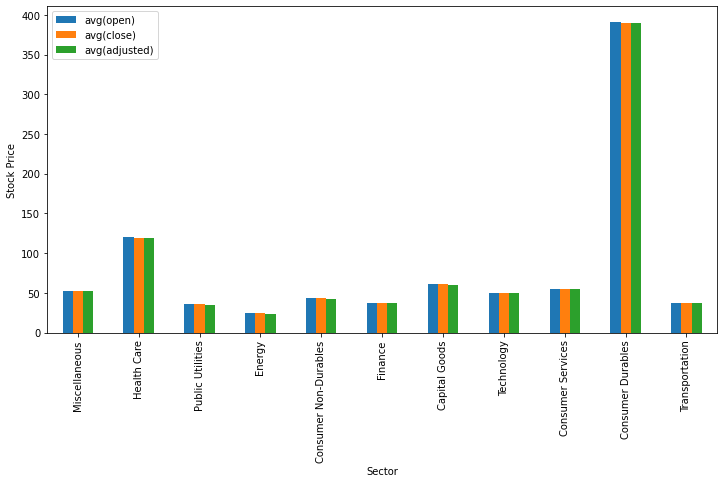

In [105]:

sec_df =  data.select(['sector', 
                       'open', 
                       'close', 
                       'adjusted']
                     )\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()

ind = list(range(12))

ind.pop(6)

sec_df.iloc[ind ,:].plot(kind = 'bar', x='sector', y = sec_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel = 'Stock Price', xlabel = 'Sector')
plt.show()

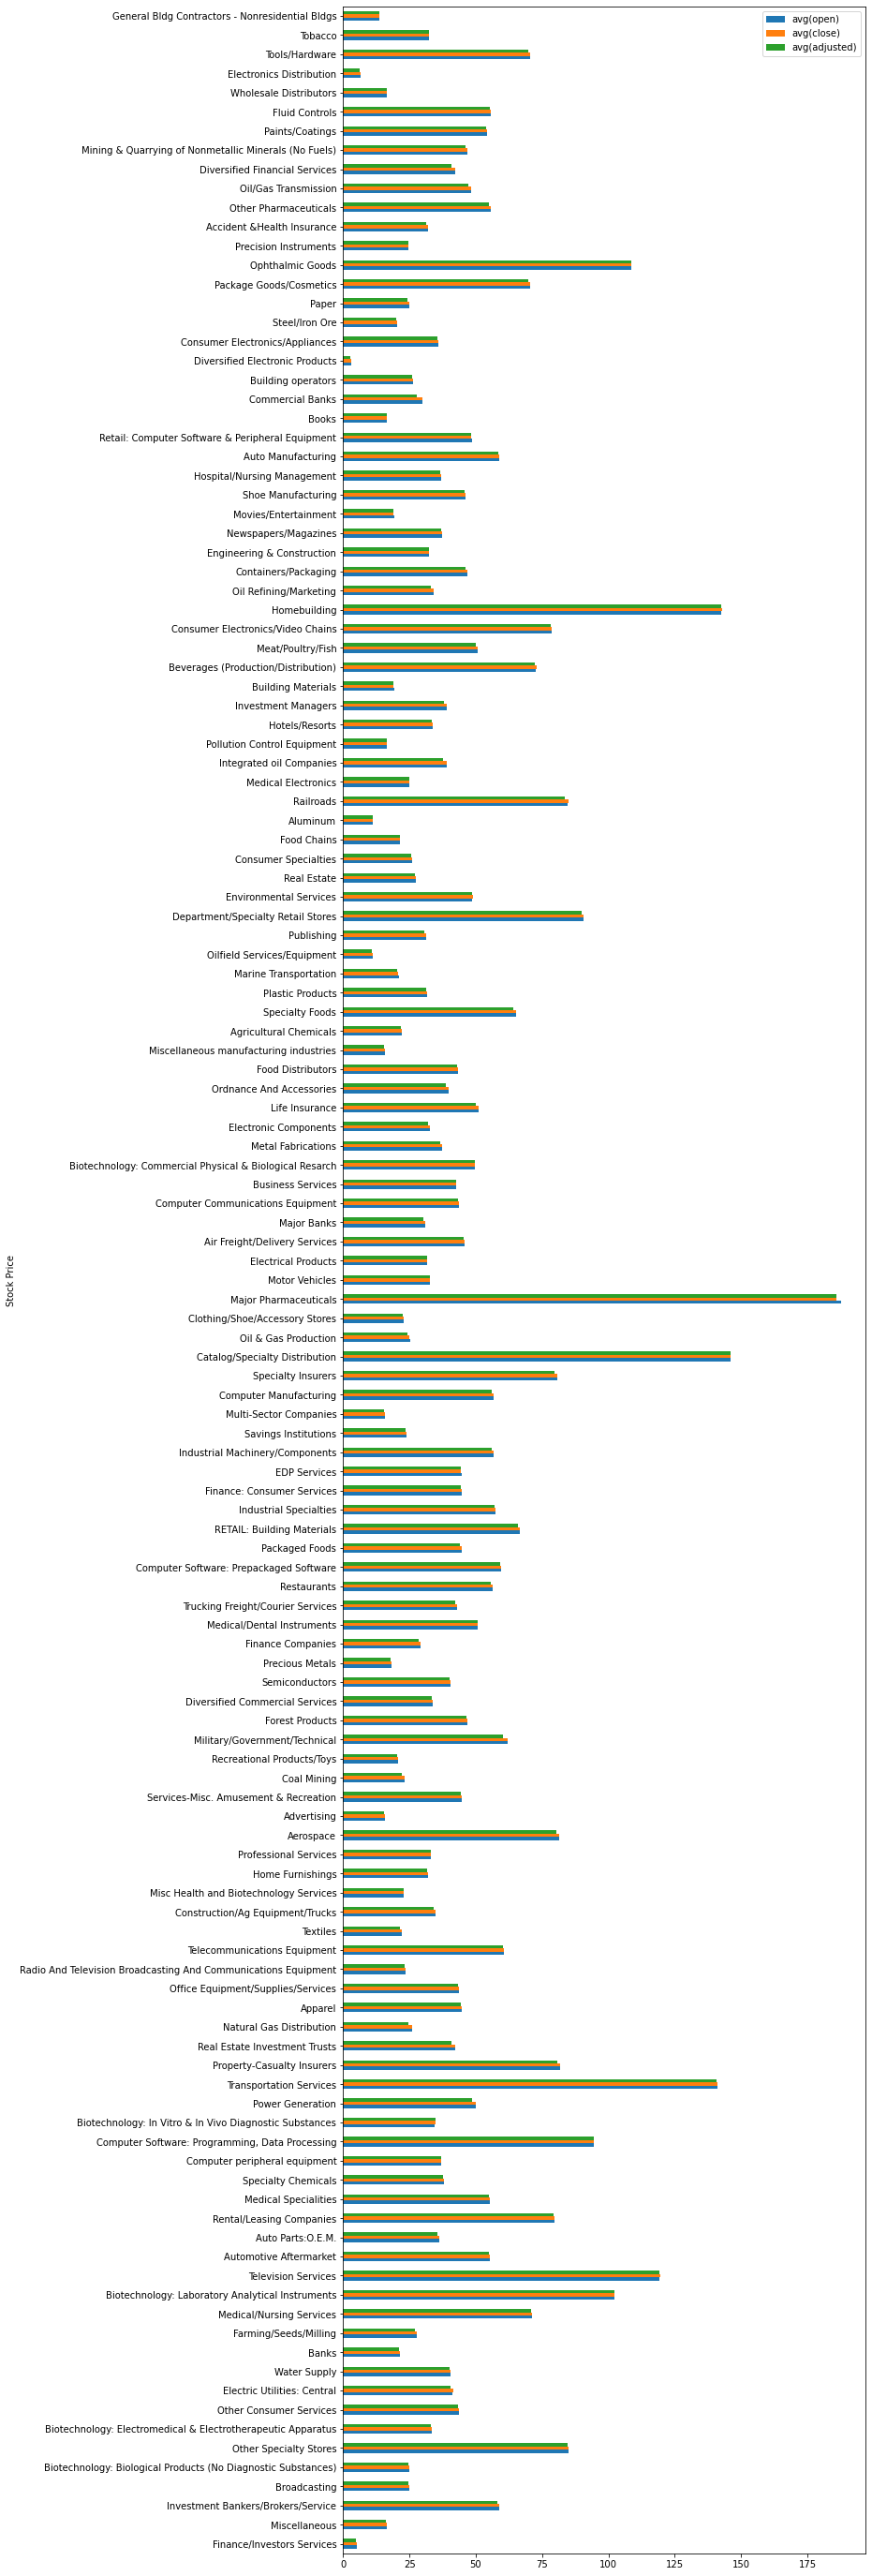

In [106]:
industries_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()

q  = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]

q.plot(kind = 'barh', x='industry', y = q.columns.tolist()[1:], figsize=(10, 50), xlabel='Stock Price', ylabel = 'Industry')

plt.show()

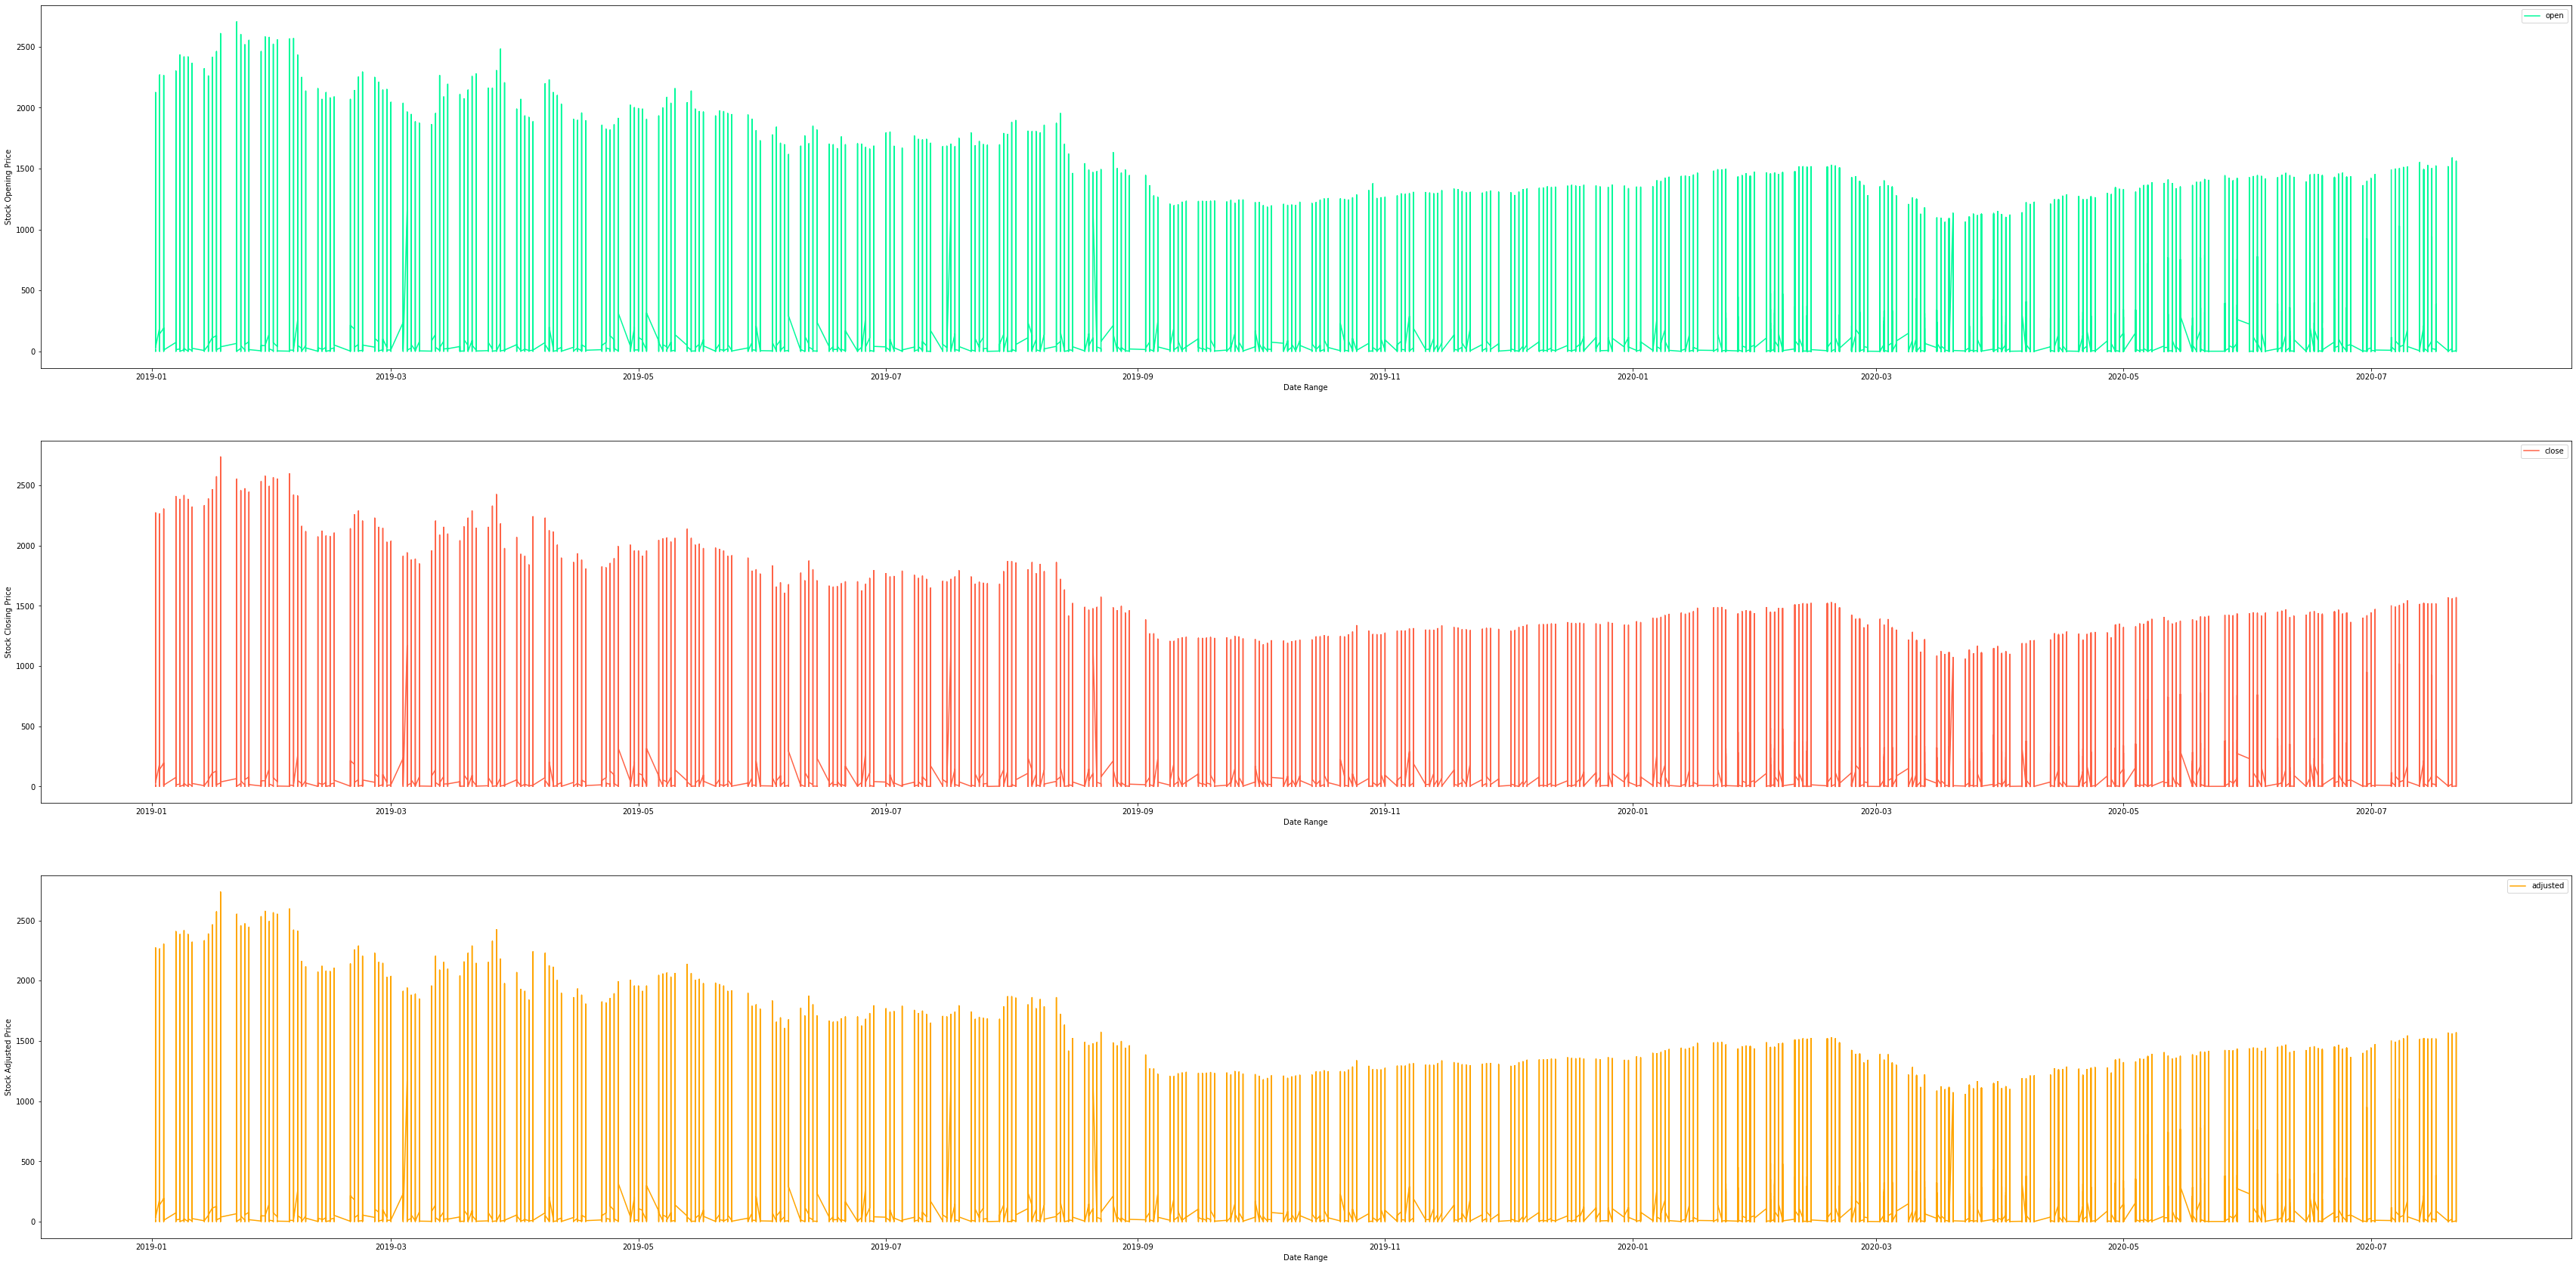

In [107]:

from pyspark.sql.functions import col

tech = data.where(col('sector') == 'Technology')\
           .select('data', 'open', 'close', 'adjusted')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(60, 30))

tech.toPandas().plot(kind = 'line', x = 'data', y='open', 
                     xlabel = 'Date Range', ylabel = 'Stock Opening Price', 
                     ax = axes[0], color = 'mediumspringgreen')

tech.toPandas().plot(kind = 'line', x = 'data', y='close',
                     xlabel = 'Date Range', ylabel = 'Stock Closing Price',
                     ax = axes[1], color = 'tomato')

tech.toPandas().plot(kind = 'line', x = 'data', y='adjusted', 
                     xlabel = 'Date Range', ylabel = 'Stock Adjusted Price', 
                     ax = axes[2], color = 'orange')

plt.show()

In [13]:

## Writing entire data to different file formats

# CSV
data.write.csv('dataset.csv')

In [14]:
# JSON
data.write.save('dataset.json', format='json')

In [15]:
# Parquet
data.write.save('dataset.parquet', format='parquet')

In [16]:
# CSV
data.select(['data', 'open', 'close', 'adjusted'])\
            .write.csv('dataset_csv_cols')